# K - Nearest Neighbour Classification

Fitting the best fit K-NN model to the dataset of social network ads and classify the customers in two groups (whether they buy the car or not) and predict whether the new customer will buy the car or not based on their estimated salary and age.

### Importing the libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [26]:
dataset = pd.read_csv('Data_set/Social_Network_Ads.csv')
X = dataset.iloc[:, 2:-1].values
Y = dataset.iloc[:, -1].values

### Splitting the dataset

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Feature scaling 

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### Fitting the model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

### Predicting the test set results

In [30]:
Y_pred = classifier.predict(X_test)

### Preparing the cofusion matrix

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

### Visualizing the training set results

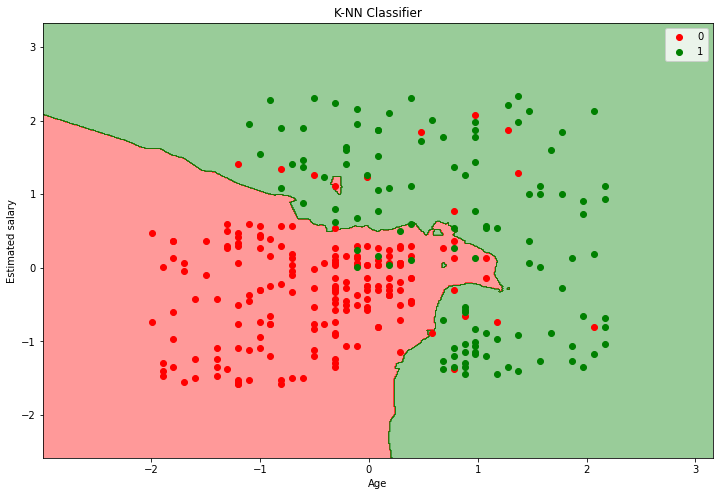

In [32]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
plt.figure(figsize = (12, 8))
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.4,
            cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()

from matplotlib.axes._axes import _log
_log.setLevel('ERROR')

plt.show()

### Visualizing the test set results

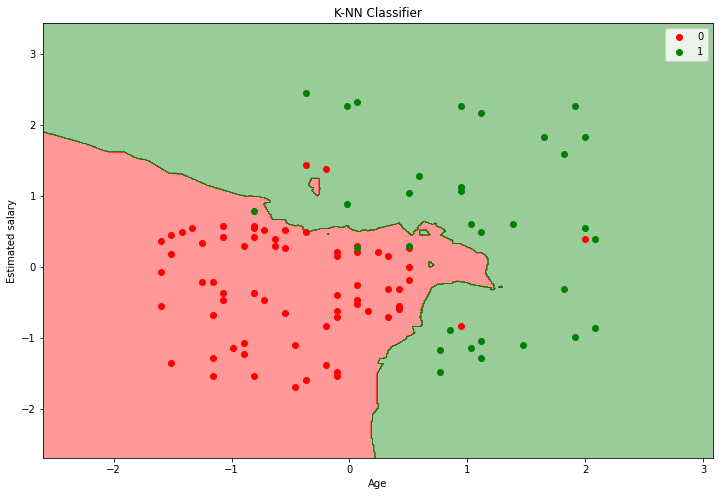

In [33]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
plt.figure(figsize = (12, 8))
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.4,
             cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()

from matplotlib.axes._axes import _log
_log.setLevel('ERROR')

plt.show()